In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)

C:\Users\Ayan Paliwal\AppData\Local\Temp\ipykernel_43548\4033484189.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
balls=pd.read_csv("D:\\Data Analyst\\Projects\\IPL PREDICTION - Copy\\IPL_Ball_by_Ball_2008_2022.csv")
matches=pd.read_csv("D:\\Data Analyst\\Projects\\IPL PREDICTION - Copy\\IPL_Matches_2008_2022.csv")
matches.head()

,ID,city,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,29-05-22,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,27-05-22,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,25-05-22,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,24-05-22,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,22-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [3]:
print(matches.shape)
print("--------------------")
print(matches.isnull().sum())
print("--------------------")
print(matches.info())

(950, 20)
--------------------
ID                   0
city                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   city             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6

In [4]:
matches[matches['WinningTeam'].isna()]

,ID,city,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
205,1178424,Bengaluru,30-04-19,2019,49,Royal Challengers Bangalore,Rajasthan Royals,M.Chinnaswamy Stadium,Rajasthan Royals,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['V Kohli', 'AB de Villiers', 'MP Stoinis', 'H...","['SV Samson', 'LS Livingstone', 'AM Rahane', '...",NJ Llong,UV Gandhe
437,829813,Bangalore,17-05-15,2015,55,Royal Challengers Bangalore,Delhi Daredevils,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['V Kohli', 'CH Gayle', 'AB de Villiers', 'Man...","['Q de Kock', 'SS Iyer', 'JP Duminy', 'Yuvraj ...",HDPK Dharmasena,K Srinivasan
464,829763,Bangalore,29-04-15,2015,29,Royal Challengers Bangalore,Rajasthan Royals,M Chinnaswamy Stadium,Rajasthan Royals,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['CH Gayle', 'V Kohli', 'AB de Villiers', 'Man...","['AM Rahane', 'SR Watson', 'SPD Smith', 'KK Na...",JD Cloete,PG Pathak
708,501265,Delhi,21-05-11,2011,68,Delhi Daredevils,Pune Warriors,Feroz Shah Kotla,Delhi Daredevils,bat,NaN,NaN,NoResults,NaN,NaN,NaN,"['NV Ojha', 'DA Warner', 'MS Wade', 'CA Ingram...","['MK Pandey', 'JP Faulkner', 'SC Ganguly', 'RV...",SS Hazare,RJ Tucker


In [5]:
matches.drop(['city',"ID",'method'],axis=1,inplace=True)
matches=matches.dropna()


In [10]:
matches.head()

,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,29-05-22,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,27-05-22,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,25-05-22,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,24-05-22,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,22-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [11]:
matches[matches['Season']=='2020/21'].head(2)

,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
134,10-11-20,2020/21,Final,Delhi Capitals,Mumbai Indians,Dubai International Cricket Stadium,Delhi Capitals,bat,N,Mumbai Indians,Wickets,5.0,TA Boult,"['MP Stoinis', 'S Dhawan', 'AM Rahane', 'SS Iy...","['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan ...",CB Gaffaney,Nitin Menon
135,08-11-20,2020/21,Qualifier 2,Delhi Capitals,Sunrisers Hyderabad,Sheikh Zayed Stadium,Delhi Capitals,bat,N,Delhi Capitals,Runs,17.0,MP Stoinis,"['MP Stoinis', 'S Dhawan', 'SS Iyer', 'SO Hetm...","['PK Garg', 'DA Warner', 'MK Pandey', 'KS Will...",PR Reiffel,S Ravi


In [12]:
matches['Date']=pd.to_datetime(matches['Date'])

In [13]:
matches['SEASON_INT']=matches['Season'].apply(lambda x:int(x[:4]))
matches['SEASON_END_INT']=matches['Season'].apply(lambda x: int('20'+ str(x[5:])) if len(x)>5 else int(x[:4]))

In [14]:
matches.drop('Season',axis=1,inplace=True)

In [15]:
matches['WinningTeam'].unique()

array(['Gujarat Titans', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Punjab Kings', 'Mumbai Indians',
       'Lucknow Super Giants', 'Sunrisers Hyderabad', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Chennai Super Kings', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [16]:
matches['Team1'] = matches['Team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['Team2'] = matches['Team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Delhi Daredevils', 'Delhi Capitals')

matches['Team1'] = matches['Team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['Team2'] = matches['Team2'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Kings XI Punjab', 'Punjab Kings')

matches['Team1'] = matches['Team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['Team2'] = matches['Team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

matches['Team1'] = matches['Team1'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
matches['Team2'] = matches['Team2'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Rising Pune Supergiant', 'Pune Warriors')

matches['Team1'] = matches['Team1'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
matches['Team2'] = matches['Team2'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Rising Pune Supergiants', 'Pune Warriors')

matches['Team1'] = matches['Team1'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['Team2'] = matches['Team2'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Gujarat Lions', 'Gujarat Titans')

In [17]:
matches.head()

,Date,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,SEASON_INT,SEASON_END_INT
0,2022-05-29,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,2022,2022
1,2022-05-27,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,2022,2022
2,2022-05-25,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,2022,2022
3,2022-05-24,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,2022,2022
4,2022-05-22,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,2022,2022


In [18]:
balls.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,batting_team
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [19]:
print(balls.shape)
print("--------------------")
print(balls.isnull().sum())
print("--------------------")
print(balls.info())

(225954, 17)
--------------------
ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
batting_team              0
dtype: int64
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 225954 non-null  int64 
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ballnumber         225954 non-null  int64 
 4   batter             225954 non-null  object
 5   bowl

In [20]:
batgroup=balls.groupby(['batter'])
batsman_Stats =pd.DataFrame(batgroup['ballnumber'].count()).rename(columns={'ballnumber':'Balls_Faced'})
batsman_Stats.head()

,Balls_Faced
batter,
A Ashish Reddy,196
A Badoni,139
A Chandila,7
A Chopra,75
A Choudhary,20


In [21]:
batgroup.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,batting_team
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225907,335982,2,8,3,AA Noffke,AB Agarkar,CL White,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225908,335982,2,8,4,AA Noffke,AB Agarkar,CL White,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225909,335982,2,8,5,AA Noffke,AB Agarkar,CL White,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225910,335982,2,8,6,AA Noffke,AB Agarkar,CL White,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [22]:
batsman_Stats['innings']=batgroup['innings'].nunique()
batsman_Stats.head()

,Balls_Faced,innings
batter,,
A Ashish Reddy,196,2
A Badoni,139,2
A Chandila,7,1
A Chopra,75,2
A Choudhary,20,2


In [23]:
batsman_Stats['runs']=batgroup['batsman_run'].sum()
batsman_Stats.head()

,Balls_Faced,innings,runs
batter,,,
A Ashish Reddy,196,2,280
A Badoni,139,2,161
A Chandila,7,1,4
A Chopra,75,2,53
A Choudhary,20,2,25


In [24]:
batsman_Stats["0s"]=balls[balls['batsman_run']==0].groupby('batter')['batsman_run'].count()
batsman_Stats['0s'].fillna(0,inplace=True)
batsman_Stats.head()

,Balls_Faced,innings,runs,0s
batter,,,,
A Ashish Reddy,196,2,280,61.0
A Badoni,139,2,161,57.0
A Chandila,7,1,4,3.0
A Chopra,75,2,53,45.0
A Choudhary,20,2,25,4.0


In [25]:
batsman_Stats['1s'] = balls[balls['batsman_run'] == 1].groupby('batter')['batsman_run'].count()
batsman_Stats['1s'].fillna(0,inplace=True)

batsman_Stats['2s'] = balls[balls['batsman_run'] == 2].groupby('batter')['batsman_run'].count()
batsman_Stats['2s'].fillna(0,inplace=True)

batsman_Stats['3s'] = balls[balls['batsman_run'] == 3].groupby('batter')['batsman_run'].count()
batsman_Stats['3s'].fillna(0,inplace=True)

batsman_Stats['4s'] = balls[balls['batsman_run'] == 4].groupby('batter')['batsman_run'].count()
batsman_Stats['4s'].fillna(0,inplace=True)

batsman_Stats['6s'] = balls[balls['batsman_run'] == 6].groupby('batter')['batsman_run'].count()
batsman_Stats['6s'].fillna(0,inplace=True)

batsman_Stats.head()

,Balls_Faced,innings,runs,0s,1s,2s,3s,4s,6s
batter,,,,,,,,,
A Ashish Reddy,196,2,280,61.0,83.0,20.0,1.0,16.0,15.0
A Badoni,139,2,161,57.0,53.0,11.0,0.0,11.0,7.0
A Chandila,7,1,4,3.0,4.0,0.0,0.0,0.0,0.0
A Chopra,75,2,53,45.0,21.0,2.0,0.0,7.0,0.0
A Choudhary,20,2,25,4.0,13.0,1.0,0.0,1.0,1.0


In [26]:
batsman_Stats['player_out']=batgroup['player_out'].count()
batsman_Stats.head()

,Balls_Faced,innings,runs,0s,1s,2s,3s,4s,6s,player_out
batter,,,,,,,,,,
A Ashish Reddy,196,2,280,61.0,83.0,20.0,1.0,16.0,15.0,15
A Badoni,139,2,161,57.0,53.0,11.0,0.0,11.0,7.0,9
A Chandila,7,1,4,3.0,4.0,0.0,0.0,0.0,0.0,1
A Chopra,75,2,53,45.0,21.0,2.0,0.0,7.0,0.0,5
A Choudhary,20,2,25,4.0,13.0,1.0,0.0,1.0,1.0,2


In [27]:
batsman_Stats['bat_average']=round(batsman_Stats['runs']/batsman_Stats['player_out'],2)
batsman_Stats['bat_average'].fillna(0,inplace=True)
batsman_Stats['bat_strike']=round(batsman_Stats['runs']/batsman_Stats['Balls_Faced']*100,2)
batsman_Stats['bat_strike'].fillna(0,inplace=True)
batsman_Stats.head()

,Balls_Faced,innings,runs,0s,1s,2s,3s,4s,6s,player_out,bat_average,bat_strike
batter,,,,,,,,,,,,
A Ashish Reddy,196,2,280,61.0,83.0,20.0,1.0,16.0,15.0,15,18.67,142.86
A Badoni,139,2,161,57.0,53.0,11.0,0.0,11.0,7.0,9,17.89,115.83
A Chandila,7,1,4,3.0,4.0,0.0,0.0,0.0,0.0,1,4.00,57.14
A Chopra,75,2,53,45.0,21.0,2.0,0.0,7.0,0.0,5,10.60,70.67
A Choudhary,20,2,25,4.0,13.0,1.0,0.0,1.0,1.0,2,12.50,125.00


In [28]:
batsman_Stats.head()

,Balls_Faced,innings,runs,0s,1s,2s,3s,4s,6s,player_out,bat_average,bat_strike
batter,,,,,,,,,,,,
A Ashish Reddy,196,2,280,61.0,83.0,20.0,1.0,16.0,15.0,15,18.67,142.86
A Badoni,139,2,161,57.0,53.0,11.0,0.0,11.0,7.0,9,17.89,115.83
A Chandila,7,1,4,3.0,4.0,0.0,0.0,0.0,0.0,1,4.00,57.14
A Chopra,75,2,53,45.0,21.0,2.0,0.0,7.0,0.0,5,10.60,70.67
A Choudhary,20,2,25,4.0,13.0,1.0,0.0,1.0,1.0,2,12.50,125.00


In [29]:
bowlgroup=balls.groupby(['bowler'])

In [30]:
bowlgroup.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,batting_team
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225748,335982,1,3,1,BB McCullum,AA Noffke,SC Ganguly,wides,0,5,5,0,0,NaN,NaN,NaN,Kolkata Knight Riders
225749,335982,1,3,2,BB McCullum,AA Noffke,SC Ganguly,NaN,6,0,6,0,0,NaN,NaN,NaN,Kolkata Knight Riders
225750,335982,1,3,3,BB McCullum,AA Noffke,SC Ganguly,legbyes,0,1,1,0,0,NaN,NaN,NaN,Kolkata Knight Riders
225751,335982,1,3,4,SC Ganguly,AA Noffke,BB McCullum,NaN,4,0,4,0,0,NaN,NaN,NaN,Kolkata Knight Riders


In [31]:
bowler_Stats=pd.DataFrame(bowlgroup['ballnumber'].count()).rename(columns={'ballnumber':'BallsThrow'})

In [32]:
balls['kind'].unique()

array([nan, 'caught', 'caught and bowled', 'run out', 'bowled', 'stumped',
       'lbw', 'hit wicket', 'retired hurt', 'retired out',
       'obstructing the field'], dtype=object)

In [33]:
wicket_out=balls[balls['kind'].isin(['caught','bowled','lbw','stumped','caught and bowled','hit wicket'])]
wicket_out.head()
bowler_Stats['wickets']=wicket_out.groupby(['bowler'])['ballnumber'].count()
bowler_Stats.head()

,BallsThrow,wickets
bowler,,
A Ashish Reddy,270,18.0
A Badoni,12,2.0
A Chandila,234,11.0
A Choudhary,108,5.0
A Dananjaya,25,NaN


In [34]:
bowler_Stats['wickets'].fillna(0,inplace=True)
bowler_Stats.head()

,BallsThrow,wickets
bowler,,
A Ashish Reddy,270,18.0
A Badoni,12,2.0
A Chandila,234,11.0
A Choudhary,108,5.0
A Dananjaya,25,0.0


In [35]:
bowler_Stats['Overs']=round(bowler_Stats['BallsThrow']/6)
bowler_Stats.head()

,BallsThrow,wickets,Overs
bowler,,,
A Ashish Reddy,270,18.0,45.0
A Badoni,12,2.0,2.0
A Chandila,234,11.0,39.0
A Choudhary,108,5.0,18.0
A Dananjaya,25,0.0,4.0


In [36]:
bowler_Stats['runs_conceded']=balls.groupby('bowler')['batsman_run'].sum()
bowler_Stats['runs_conceded']=bowler_Stats['runs_conceded'].fillna(0)
bowler_Stats.head()

,BallsThrow,wickets,Overs,runs_conceded
bowler,,,,
A Ashish Reddy,270,18.0,45.0,386
A Badoni,12,2.0,2.0,11
A Chandila,234,11.0,39.0,242
A Choudhary,108,5.0,18.0,137
A Dananjaya,25,0.0,4.0,46


In [37]:
bowler_Stats['runs_conceded']=bowler_Stats['runs_conceded'].add(balls[balls['extra_type'].isin(['wides','noballs'])].groupby('bowler')['extras_run'].sum(),fill_value=0)

In [38]:
bowler_Stats.head()

,BallsThrow,wickets,Overs,runs_conceded
bowler,,,,
A Ashish Reddy,270,18.0,45.0,396.0
A Badoni,12,2.0,2.0,11.0
A Chandila,234,11.0,39.0,242.0
A Choudhary,108,5.0,18.0,144.0
A Dananjaya,25,0.0,4.0,47.0


In [39]:
bowler_Stats['bowl_econ']=round(bowler_Stats['runs_conceded']/bowler_Stats['Overs'],2)
bowler_Stats['bowl_strike_rate']=round(bowler_Stats['BallsThrow']/bowler_Stats['wickets'],2)
bowler_Stats.head()

,BallsThrow,wickets,Overs,runs_conceded,bowl_econ,bowl_strike_rate
bowler,,,,,,
A Ashish Reddy,270,18.0,45.0,396.0,8.80,15.00
A Badoni,12,2.0,2.0,11.0,5.50,6.00
A Chandila,234,11.0,39.0,242.0,6.21,21.27
A Choudhary,108,5.0,18.0,144.0,8.00,21.60
A Dananjaya,25,0.0,4.0,47.0,11.75,inf


In [40]:
players_matches_dict = {}

# Iterate over each row in the dataframe
for i, row in balls.iterrows():
    # Check if the batter is already in the dictionary
    if row['batter'] in players_matches_dict:
        players_matches_dict[row['batter']].add(row['ID'])
    else:
        players_matches_dict[row['batter']] = {row['ID']}

    # Check if the non-striker is already in the dictionary
    if row['non-striker'] in players_matches_dict:
        players_matches_dict[row['non-striker']].add(row['ID'])
    else:
        players_matches_dict[row['non-striker']] = {row['ID']}

    # Check if the bowler is already in the dictionary
    if row['bowler'] in players_matches_dict:
        players_matches_dict[row['bowler']].add(row['ID'])
    else:
        players_matches_dict[row['bowler']] = {row['ID']}

# Create a dataframe with players and their number of matches
final_players_matches = pd.DataFrame({'Players': list(players_matches_dict.keys())})
final_players_matches['matches'] = final_players_matches['Players'].apply(lambda x: len(players_matches_dict[x]))
final_players_matches = final_players_matches.set_index('Players')

In [41]:
final_players_matches.head()


,matches
Players,
YBK Jaiswal,23
JC Buttler,81
Mohammed Shami,93
Yash Dayal,9
SV Samson,134


In [42]:
# Catches Caught by Players
outbyCatch = balls[(balls['kind'].isin(['caught and bowled']))].groupby('bowler')['ballnumber'].count().rename('bowler_catches')
justCatch = balls[(balls['kind'].isin(['caught']))].groupby('fielders_involved')['ballnumber'].count().rename('fielder_catches')

catchDf = pd.merge(outbyCatch,justCatch, left_index=True, right_index=True,how='outer')
catchDf.fillna(0,inplace=True)
catchDf['catches'] = catchDf['bowler_catches']+catchDf['fielder_catches']
catchDf.drop(['bowler_catches','fielder_catches'],axis=1,inplace=True)

In [43]:
catchDf.head()

,catches
A Ashish Reddy,9.0
A Badoni,9.0
A Chandila,7.0
A Chopra,2.0
A Flintoff,4.0


In [44]:
# Merging Batsman Stats
final_df = pd.merge(final_players_matches,batsman_Stats, left_index=True, right_index=True,how='outer')
# Merging Bowler Stats
final_df = pd.merge(final_df,bowler_Stats, left_index=True, right_index=True,how='outer')
# Merging Catches Stats of Each Player
final_df = pd.merge(final_df,catchDf, left_index=True, right_index=True,how='outer')
# Merging the data of players who got Man of the Match of not
final_df = pd.merge(final_df,matches['Player_of_Match'].value_counts(),left_index=True, right_index=True,how='left')
# Making all the NAN values to 0 because they don't have the values Like a person who does not get Player of the Match is marked as NaN so I Make it 0
final_df.fillna(0,inplace=True)

final_df.head()

,matches,Balls_Faced,innings,runs,0s,1s,2s,3s,4s,6s,player_out,bat_average,bat_strike,BallsThrow,wickets,Overs,runs_conceded,bowl_econ,bowl_strike_rate,catches,count
A Ashish Reddy,28.0,196.0,2.0,280.0,61.0,83.0,20.0,1.0,16.0,15.0,15.0,18.67,142.86,270.0,18.0,45.0,396.0,8.80,15.00,9.0,0.0
A Badoni,11.0,139.0,2.0,161.0,57.0,53.0,11.0,0.0,11.0,7.0,9.0,17.89,115.83,12.0,2.0,2.0,11.0,5.50,6.00,9.0,0.0
A Chandila,12.0,7.0,1.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,1.0,4.00,57.14,234.0,11.0,39.0,242.0,6.21,21.27,7.0,1.0
A Chopra,6.0,75.0,2.0,53.0,45.0,21.0,2.0,0.0,7.0,0.0,5.0,10.60,70.67,0.0,0.0,0.0,0.0,0.00,0.00,2.0,0.0
A Choudhary,5.0,20.0,2.0,25.0,4.0,13.0,1.0,0.0,1.0,1.0,2.0,12.50,125.00,108.0,5.0,18.0,144.0,8.00,21.60,0.0,0.0


In [45]:
final_df.rename(columns={'count':'Player_of_Match'},inplace=True)

In [46]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
import plotly.express as px


In [48]:
fig = px.bar(final_df, x='Player_of_Match', y='runs', title='Number of runs scored by different players and they get Player of Match',hover_name=final_df.index,color='runs')
fig.show()

In [49]:
# create a bar plot to see the Number of Wickets taken by different players and they get Player of Match
fig = px.bar(final_df, x='Player_of_Match', y='wickets', title='Number of Wickets taken by different players and they get Player of Match',hover_name=final_df.index,color='wickets')
# show the plot
fig.show()

In [50]:
# Create the scatter plot to see the Most Player of the Match by a Player
fig = px.scatter(final_df, x='matches', y='Player_of_Match',color='Player_of_Match',
                 size='Player_of_Match', hover_name=final_df.index, title='Player of the Match')
fig.update_layout(coloraxis=dict(colorscale='reds'))
# Show the plot
fig.show()

In [51]:
# Create the scatter plot to see Which player has best strike rate 
fig = px.scatter(final_df, x='matches', y='bat_strike',color='bat_strike',
                 size='bat_strike', hover_name=final_df.index, title='Batsman Strike Rate')
fig.update_layout(coloraxis=dict(colorscale='reds'))
# Show the plot
fig.show()

In [52]:
# Create the scatter plot to see the Which Player got most Catches
fig = px.scatter(final_df, x='matches', y='catches',color='catches',
                 size='catches', hover_name=final_df.index, title='MOst Catches by the Player')
fig.update_layout(coloraxis=dict(colorscale='reds'))
# Show the plot
fig.show()

In [53]:
# Create the scatter plot to see the Bowling Economy by players
fig = px.scatter(final_df, x='matches', y='bowl_econ',color='bowl_econ',
                 size='catches', hover_name=final_df.index, title='Bowling Economy')
fig.update_layout(coloraxis=dict(colorscale='reds'))
# Show the plot
fig.show()

In [54]:
# Create the scatter plot to see the Most 6s by a Batsman
fig = px.scatter(final_df, x='matches', y='6s',color='6s',
                 size='6s', hover_name=final_df.index, title='MOst 6s by a Batsman')
fig.update_layout(coloraxis=dict(colorscale='greens'))
# Show the plot
fig.show()

In [55]:
# Create the scatter plot to see the Most 4s by a Batsman
fig = px.scatter(final_df, x='matches', y='4s',color='4s',
                 size='4s', hover_name=final_df.index, title='Most 4s by a Batsman')
fig.update_layout(coloraxis=dict(colorscale='blues'))

# Show the plot
fig.show()

In [56]:
# Create the scatter plot to see the Most 0s on the balls they Faced by a Batsman
fig = px.scatter(final_df, x='matches', y='0s',color='0s',
                 size='0s', hover_name=final_df.index, title='Most 0s by a Batsman for each ball they face')
fig.update_layout(coloraxis=dict(colorscale='blues'))

# Show the plot
fig.show()

In [57]:

# Calculate the ratio of matches to player_out
final_df['not_out'] = final_df['matches'] - final_df['player_out']

# Create the scatter plot to see the Most Time Out by a Batsman
fig = px.scatter(final_df, x='player_out', y='not_out', color='runs',
                 size='player_out', hover_name=final_df.index, 
                 title='Most Time Out by a Batsman vs Matches Played to Player Not Out Matches')
fig.update_layout(coloraxis=dict(colorscale='blues'))

# Show the plot
fig.show()

In [58]:
final_df = final_df[final_df['matches']>50]
final_df.head()


,matches,Balls_Faced,innings,runs,0s,1s,2s,3s,4s,6s,player_out,bat_average,bat_strike,BallsThrow,wickets,Overs,runs_conceded,bowl_econ,bowl_strike_rate,catches,Player_of_Match,not_out
A Mishra,154.0,410.0,2.0,362.0,182.0,172.0,22.0,0.0,29.0,5.0,30.0,12.07,88.29,3317.0,166.0,553.0,3976.0,7.19,19.98,21.0,12.0,124.0
A Nehra,88.0,63.0,2.0,41.0,37.0,21.0,1.0,0.0,3.0,1.0,8.0,5.12,65.08,1974.0,106.0,329.0,2495.0,7.58,18.62,19.0,6.0,80.0
AB Dinda,76.0,50.0,2.0,26.0,31.0,16.0,1.0,0.0,2.0,0.0,9.0,2.89,52.00,1589.0,69.0,265.0,2073.0,7.82,23.03,7.0,2.0,67.0
AB de Villiers,170.0,3487.0,4.0,5181.0,1115.0,1420.0,268.0,17.0,414.0,253.0,125.0,41.45,148.58,0.0,0.0,0.0,0.0,0.00,0.00,120.0,24.0,45.0
AC Gilchrist,80.0,1555.0,2.0,2069.0,737.0,417.0,66.0,4.0,239.0,92.0,76.0,27.22,133.05,1.0,1.0,0.0,0.0,0.00,1.00,51.0,7.0,4.0


In [59]:
import plotly.graph_objects as go
# Sort the dataframe by batting average and select the top 10
df_top10 = final_df.sort_values('bat_average', ascending=False).head(10)


# Create the plot using Plotly
fig = go.Figure(data=[go.Bar(
    x=df_top10.index, y=df_top10['bat_average'],
    text=df_top10['matches'].astype(str) + ' matches, ' + df_top10['runs'].astype(str) + ' runs, ' + df_top10['player_out'].astype(str) + ' outs, ' + df_top10['not_out'].astype(str) + ' not outs',
    textposition='auto',
    marker=dict(color=df_top10['bat_average'], coloraxis="coloraxis")
)])
fig.update_layout(title='Top 10 Batsmen based on Batting Average', xaxis_title="Player", yaxis_title="Batting Average")

fig.show()


In [60]:

# Sort the dataframe by number of wickets and select the top 10
df_top10 = final_df.sort_values('wickets', ascending=False).head(10)


# Create the plot using Plotly
fig = go.Figure(data=[go.Bar(
    x=df_top10.index, y=df_top10['wickets'],
    text=df_top10['matches'].astype(str) + ' matches, ' + df_top10['wickets'].astype(str) + ' wickets, ' + df_top10['runs_conceded'].astype(str) + ' RunGive, ' + df_top10['BallsThrow'].astype(str) + ' BallsThrow',
    textposition='auto',
    marker=dict(color=df_top10['wickets'], coloraxis="coloraxis")
)])
fig.update_layout(title='Top 10 Bowler based on Wickets', xaxis_title="Player", yaxis_title="Wickets")
fig.show()

In [61]:
# Create a new column for the winning team
matches["WinningTeam"] = matches.apply(lambda row: row["Team1"] if row["WinningTeam"] == "N" else row["Team2"], axis=1)

# Count the number of wins for each team
wins = matches["WinningTeam"].value_counts()
print(wins)
# Sort the teams by win percentage
win_percentages = wins.sort_values(ascending=False)

# Plot the results

fig = go.Figure() 
fig.add_trace(go.Bar(x=wins.index[:10], y=wins.values[:10], name="Matches won"))
fig.update_layout(title="Top 10 Best Performing Teams", xaxis_title="Team", yaxis_title="Matches won")
fig.show()

WinningTeam
Kolkata Knight Riders          118
Mumbai Indians                 117
Sunrisers Hyderabad            116
Delhi Capitals                 107
Punjab Kings                   104
Rajasthan Royals                99
Royal Challengers Bangalore     99
Chennai Super Kings             97
Pune Warriors                   31
Gujarat Titans                  23
Lucknow Super Giants             7
Pune Warriorss                   7
Kochi Tuskers Kerala             7
Name: count, dtype: int64


In [62]:

fig = go.Figure() 
fig.add_trace(go.Bar(x=wins.index[-10:], y=wins.values[-10:], name="Matches won"))
fig.update_layout(title="Top 10 Least Performing Teams", xaxis_title="Team", yaxis_title="Matches won")
fig.show()

In [63]:
team_counts = pd.concat([matches['Team1'], matches['Team2']]).value_counts()
print(team_counts)

Mumbai Indians                 227
Sunrisers Hyderabad            223
Royal Challengers Bangalore    220
Kolkata Knight Riders          219
Delhi Capitals                 218
Punjab Kings                   214
Chennai Super Kings            207
Rajasthan Royals               187
Pune Warriors                   61
Gujarat Titans                  45
Lucknow Super Giants            15
Pune Warriorss                  14
Kochi Tuskers Kerala            14
Name: count, dtype: int64


In [64]:
Win_percentage=(wins / team_counts) * 100
Win_percentage.sort_values(ascending=False,inplace=True)
print(Win_percentage)

Kolkata Knight Riders          53.881279
Rajasthan Royals               52.941176
Sunrisers Hyderabad            52.017937
Mumbai Indians                 51.541850
Gujarat Titans                 51.111111
Pune Warriors                  50.819672
Kochi Tuskers Kerala           50.000000
Pune Warriorss                 50.000000
Delhi Capitals                 49.082569
Punjab Kings                   48.598131
Chennai Super Kings            46.859903
Lucknow Super Giants           46.666667
Royal Challengers Bangalore    45.000000
Name: count, dtype: float64


In [65]:

fig = go.Figure() 
fig.add_trace(go.Bar(x=Win_percentage.index[:], y=Win_percentage.values[:], name="Winning Percentage"))
fig.update_layout(title="Winning Percentage of each team", xaxis_title="Team", yaxis_title="Winning Percentage")
fig.show()

In [66]:
matches=pd.read_csv("D:\\Data Analyst\\Projects\\IPL PREDICTION - Copy\\IPL_Matches_2008_2022.csv")
matches.drop(['city','ID','method'],axis=1,inplace=True)
matches = matches.dropna()
matches['SEASON_INT'] = matches['Season'].apply(lambda x: int(x[:4]))
matches['SEASON_END_INT'] = matches['Season'].apply(lambda x: int('20'+str(x[5:])) if len(x)>5 else int(x[:4]))

# Convert the Date column to a datetime data type
matches['Date'] = pd.to_datetime(matches['Date'])

# Group the data by season and select the last row of each group
last_matches = matches.sort_values('Date').groupby('Season').tail(1)
win_number=last_matches['WinningTeam'].groupby(last_matches['WinningTeam']).count()
# Select the Season and WinningTeam columns
winning_teams = last_matches[['SEASON_END_INT', 'WinningTeam']]


In [67]:
matches.head()


,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,SEASON_INT,SEASON_END_INT
0,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,2022,2022
1,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,2022,2022
2,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,2022,2022
3,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,2022,2022
4,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,2022,2022


In [68]:
last_matches.head()

,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,SEASON_INT,SEASON_END_INT
916,2008-12-05,2007/08,34,Kings XI Punjab,Royal Challengers Bangalore,"Punjab Cricket Association Stadium, Mohali",Royal Challengers Bangalore,bat,N,Kings XI Punjab,Wickets,9.0,SE Marsh,"['SE Marsh', 'JR Hopes', 'LA Pomersbach', 'Yuv...","['J Arunkumar', 'V Kohli', 'Misbah-ul-Haq', 'C...",BR Doctrove,I Shivram,2007,2008
852,2009-12-05,2009,42,Kings XI Punjab,Mumbai Indians,SuperSport Park,Kings XI Punjab,bat,N,Mumbai Indians,Wickets,8.0,Harbhajan Singh,"['S Sohal', 'SM Katich', 'IK Pathan', 'KC Sang...","['ST Jayasuriya', 'DJ Bravo', 'AM Rahane', 'SR...",SS Hazare,RE Koertzen,2009,2009
789,2010-12-04,2009/10,46,Deccan Chargers,Royal Challengers Bangalore,"Vidarbha Cricket Association Stadium, Jamtha",Royal Challengers Bangalore,field,N,Deccan Chargers,Runs,13.0,Harmeet Singh,"['HH Gibbs', 'AC Gilchrist', 'TL Suman', 'RG S...","['MK Pandey', 'JH Kallis', 'R Dravid', 'RV Uth...",RE Koertzen,RB Tiffin,2009,2010
720,2011-12-05,2011,56,Chennai Super Kings,Delhi Daredevils,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,18.0,MS Dhoni,"['MEK Hussey', 'M Vijay', 'SK Raina', 'S Badri...","['NV Ojha', 'DA Warner', 'CA Ingram', 'IK Path...",AM Saheba,SL Shastri,2011,2011
646,2012-12-05,2012,58,Kolkata Knight Riders,Mumbai Indians,Eden Gardens,Mumbai Indians,bat,N,Mumbai Indians,Runs,27.0,RG Sharma,"['MS Bisla', 'G Gambhir', 'JH Kallis', 'MK Tiw...","['HH Gibbs', 'SR Tendulkar', 'RG Sharma', 'KD ...",S Ravi,SJA Taufel,2012,2012


In [69]:
winning_teams.head()

,SEASON_END_INT,WinningTeam
916,2008,Kings XI Punjab
852,2009,Mumbai Indians
789,2010,Deccan Chargers
720,2011,Chennai Super Kings
646,2012,Mumbai Indians


In [70]:
win_number = last_matches['WinningTeam'].groupby(last_matches['WinningTeam']).count().reset_index(name='counts')


In [71]:
print(win_number)

                   WinningTeam  counts
0          Chennai Super Kings       1
1              Deccan Chargers       1
2             Delhi Daredevils       3
3              Kings XI Punjab       1
4        Kolkata Knight Riders       1
5               Mumbai Indians       5
6                 Punjab Kings       1
7             Rajasthan Royals       1
8  Royal Challengers Bangalore       1


In [72]:
# Plot the most winning team for each year
fig = px.bar(winning_teams, x='WinningTeam', y='SEASON_END_INT', hover_name='WinningTeam',color='SEASON_END_INT')
fig.show()

<Axes: >

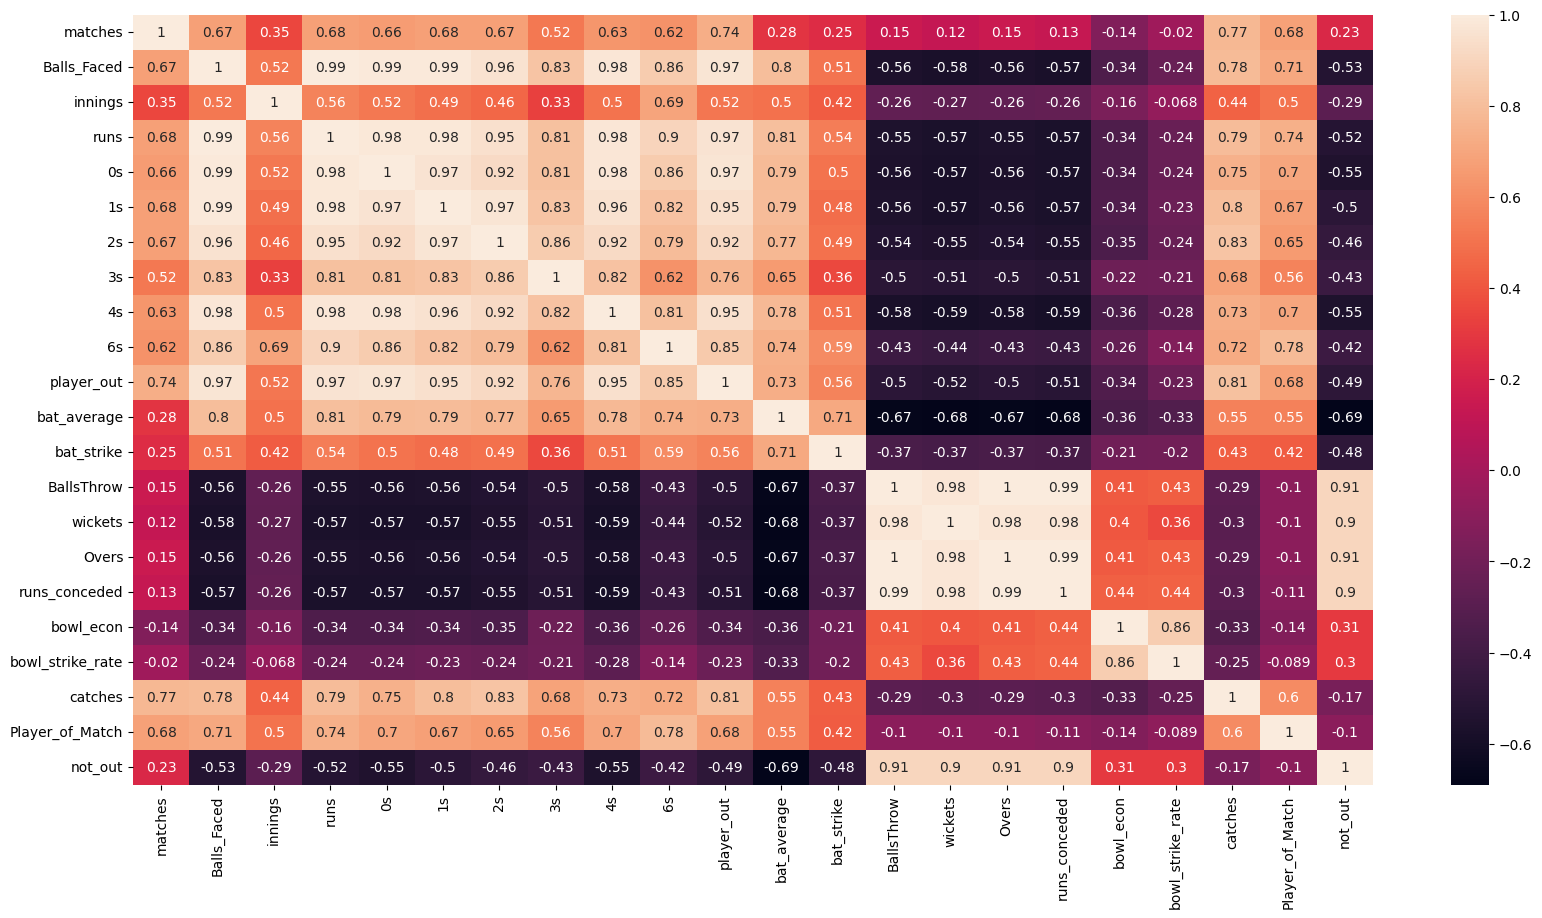

In [73]:
plt.figure(figsize=(20,10))
sns.heatmap(final_df.corr(),annot=True)

In [74]:
def correlation(data, threshold):
    corr_matrix = data.corr()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
    col_corr = [col for col in upper_triangle.columns if any(upper_triangle[col] > threshold)]
    return col_corr

In [75]:
corr_cols = correlation(final_df,0.85)
corr_cols

['runs',
 '0s',
 '1s',
 '2s',
 '3s',
 '4s',
 '6s',
 'player_out',
 'wickets',
 'Overs',
 'runs_conceded',
 'bowl_strike_rate',
 'not_out']

In [76]:
top_columns =final_df.drop(['runs',
 '0s',
 '1s',
 '2s',
 '3s',
 '4s',
 '6s',
 'player_out',
 'wickets',
 'Overs',
 'runs_conceded',
 'bowl_strike_rate',
 'not_out'],axis=1)

In [77]:
top_columns.info()


<class 'pandas.core.frame.DataFrame'>
Index: 132 entries, A Mishra to Z Khan
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   matches          132 non-null    float64
 1   Balls_Faced      132 non-null    float64
 2   innings          132 non-null    float64
 3   bat_average      132 non-null    float64
 4   bat_strike       132 non-null    float64
 5   BallsThrow       132 non-null    float64
 6   bowl_econ        132 non-null    float64
 7   catches          132 non-null    float64
 8   Player_of_Match  132 non-null    float64
dtypes: float64(9)
memory usage: 10.3+ KB


In [78]:
final_df_new = top_columns[np.isfinite(top_columns).all(1)]    #excludes all infinite and null values
final_df_new.head()

,matches,Balls_Faced,innings,bat_average,bat_strike,BallsThrow,bowl_econ,catches,Player_of_Match
A Mishra,154.0,410.0,2.0,12.07,88.29,3317.0,7.19,21.0,12.0
A Nehra,88.0,63.0,2.0,5.12,65.08,1974.0,7.58,19.0,6.0
AB Dinda,76.0,50.0,2.0,2.89,52.00,1589.0,7.82,7.0,2.0
AB de Villiers,170.0,3487.0,4.0,41.45,148.58,0.0,0.00,120.0,24.0
AC Gilchrist,80.0,1555.0,2.0,27.22,133.05,1.0,0.00,51.0,7.0


In [79]:
final_df_new.isna().sum()

matches            0
Balls_Faced        0
innings            0
bat_average        0
bat_strike         0
BallsThrow         0
bowl_econ          0
catches            0
Player_of_Match    0
dtype: int64

In [80]:
balls=pd.read_csv("D:\\Data Analyst\\Projects\\IPL PREDICTION - Copy\\IPL_Ball_by_Ball_2008_2022.csv")
matches=pd.read_csv("D:\\Data Analyst\\Projects\\IPL PREDICTION - Copy\\IPL_Matches_2008_2022.csv")


In [81]:
inningScores = balls.groupby(['ID', 'innings'])['total_run'].sum().reset_index()
inningScores = inningScores[inningScores['innings']==1]
inningScores.head(10)

,ID,innings,total_run
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
10,335987,1,166
12,335988,1,142
14,335989,1,208
16,335990,1,214
18,335991,1,182


In [82]:
inningScores['total_run_x'] = inningScores['total_run'] + 1
inningScores.head(10)

,ID,innings,total_run,total_run_x
0,335982,1,222,223
2,335983,1,240,241
4,335984,1,129,130
6,335985,1,165,166
8,335986,1,110,111
10,335987,1,166,167
12,335988,1,142,143
14,335989,1,208,209
16,335990,1,214,215
18,335991,1,182,183


In [83]:
matches = matches.merge(inningScores[['ID','total_run_x']], on='ID')
matches.head()


,ID,city,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,total_run_x
0,1312200,Ahmedabad,29-05-22,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,131
1,1312199,Ahmedabad,27-05-22,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,158
2,1312198,Kolkata,25-05-22,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,208
3,1312197,Kolkata,24-05-22,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,189
4,1304116,Mumbai,22-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,158


In [84]:
matches['Team1'] = matches['Team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['Team2'] = matches['Team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Delhi Daredevils', 'Delhi Capitals')

matches['Team1'] = matches['Team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['Team2'] = matches['Team2'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Kings XI Punjab', 'Punjab Kings')

matches['Team1'] = matches['Team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['Team2'] = matches['Team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

matches['Team1'] = matches['Team1'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
matches['Team2'] = matches['Team2'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Rising Pune Supergiant', 'Pune Warriors')

matches['Team1'] = matches['Team1'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
matches['Team2'] = matches['Team2'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Rising Pune Supergiants', 'Pune Warriors')


matches['Team1'] = matches['Team1'].str.replace('Pune Warriorss', 'Pune Warriors')
matches['Team2'] = matches['Team2'].str.replace('Pune Warriorss', 'Pune Warriors')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Pune Warriorss', 'Pune Warriors')

matches['Team1'] = matches['Team1'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['Team2'] = matches['Team2'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Gujarat Lions', 'Gujarat Titans')

In [85]:
teams2023 = [
    'Rajasthan Royals',
    'Royal Challengers Bangalore',
    'Sunrisers Hyderabad', 
    'Delhi Capitals', 
    'Chennai Super Kings',
    'Gujarat Titans', 
    'Lucknow Super Giants', 
    'Kolkata Knight Riders',
    'Punjab Kings', 
    'Mumbai Indians'
]

In [86]:
matches = matches[matches['Team1'].isin(teams2023)]
matches = matches[matches['Team2'].isin(teams2023)]
matches = matches[matches['WinningTeam'].isin(teams2023)]

In [87]:
matches['Team1'].unique()


array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians'], dtype=object)

In [88]:
matches.head()


,ID,city,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,total_run_x
0,1312200,Ahmedabad,29-05-22,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,131
1,1312199,Ahmedabad,27-05-22,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,158
2,1312198,Kolkata,25-05-22,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,208
3,1312197,Kolkata,24-05-22,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,189
4,1304116,Mumbai,22-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,158


In [89]:
matches.shape

(858, 21)

In [90]:
matches.isnull().sum()


ID                   0
city                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            0
WinningTeam          0
WonBy                0
Margin              14
method             843
Player_of_Match      0
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
total_run_x          0
dtype: int64

In [91]:

matches = matches[['ID','city','Team1','Team2','WinningTeam','total_run_x']].dropna()
matches.head()

,ID,city,Team1,Team2,WinningTeam,total_run_x
0,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131
1,1312199,Ahmedabad,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,158
2,1312198,Kolkata,Royal Challengers Bangalore,Lucknow Super Giants,Royal Challengers Bangalore,208
3,1312197,Kolkata,Rajasthan Royals,Gujarat Titans,Gujarat Titans,189
4,1304116,Mumbai,Sunrisers Hyderabad,Punjab Kings,Punjab Kings,158


In [92]:
balls['batting_team'] = balls['batting_team'].str.replace('Delhi Daredevils', 'Delhi Capitals')
balls['batting_team'] = balls['batting_team'].str.replace('Kings XI Punjab', 'Punjab Kings')
balls['batting_team'] = balls['batting_team'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
balls['batting_team'] = balls['batting_team'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
balls['batting_team'] = balls['batting_team'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
balls['batting_team'] = balls['batting_team'].str.replace('Pune Warriorss', 'Pune Warriors')
balls['batting_team'] = balls['batting_team'].str.replace('Gujarat Lions', 'Gujarat Titans')

In [93]:
balls = balls[balls['batting_team'].isin(teams2023)]
balls.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,batting_team
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [94]:
final = matches.merge(balls, on='ID')
final.head()

,ID,city,Team1,Team2,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,batting_team
0,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [95]:
final = final[final['innings']==2]
final.head()

,ID,city,Team1,Team2,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,batting_team
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,1,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,2,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,3,WP Saha,TA Boult,Shubman Gill,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,4,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,5,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans


In [96]:
final['current_score'] = final.groupby('ID')['total_run'].cumsum()
final.head()


,ID,city,Team1,Team2,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,batting_team,current_score
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,1,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,2,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,3,WP Saha,TA Boult,Shubman Gill,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,4,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,5,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1


In [97]:
final['runs_left'] = np.where(final['total_run_x']-final['current_score']>=0, final['total_run_x']-final['current_score'], 0)
final.head()

,ID,city,Team1,Team2,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,batting_team,current_score,runs_left
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,1,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,2,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,3,WP Saha,TA Boult,Shubman Gill,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,130
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,4,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,5,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130


In [98]:
final['balls_left'] = np.where(120 - final['overs']*6 - final['ballnumber']>=0,120 - final['overs']*6 - final['ballnumber'], 0)
final.head()


,ID,city,Team1,Team2,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,batting_team,current_score,runs_left,balls_left
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,1,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,119
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,2,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,118
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,3,WP Saha,TA Boult,Shubman Gill,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,117
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,4,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,116
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,5,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,115


In [99]:
final['wickets_remaining'] = 10 - final.groupby('ID')['isWicketDelivery'].cumsum()
final.head()

,ID,city,Team1,Team2,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,batting_team,current_score,runs_left,balls_left,wickets_remaining
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,1,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,119,10
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,2,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,118,10
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,3,WP Saha,TA Boult,Shubman Gill,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,117,10
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,4,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,116,10
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,5,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,115,10


In [100]:
final['crr'] = (final['current_score']*6)/(120-final['balls_left'])
final['rrr'] = np.where(final['balls_left']>0, final['runs_left']*6/final['balls_left'], 0)

In [101]:
def result(row):
    return 1 if row['batting_team'] == row['WinningTeam'] else 0


In [102]:
final['result'] = final.apply(result, axis=1)
final.head()

,ID,city,Team1,Team2,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,batting_team,current_score,runs_left,balls_left,wickets_remaining,crr,rrr,result
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,1,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,119,10,0.0,6.605042,1
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,2,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,118,10,0.0,6.661017,1
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,3,WP Saha,TA Boult,Shubman Gill,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,117,10,2.0,6.666667,1
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,4,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,116,10,1.5,6.724138,1
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,5,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,115,10,1.2,6.782609,1


In [103]:
final['bowling_team']=np.where(final['Team1']==final['batting_team'],final['Team2'],final['Team1'])
final.head()

,ID,city,Team1,Team2,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,batting_team,current_score,runs_left,balls_left,wickets_remaining,crr,rrr,result,bowling_team
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,1,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,119,10,0.0,6.605042,1,Rajasthan Royals
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,2,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,118,10,0.0,6.661017,1,Rajasthan Royals
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,3,WP Saha,TA Boult,Shubman Gill,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,117,10,2.0,6.666667,1,Rajasthan Royals
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,4,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,116,10,1.5,6.724138,1,Rajasthan Royals
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,5,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,115,10,1.2,6.782609,1,Rajasthan Royals


In [104]:
winningPred = final[['batting_team', 'bowling_team','city','runs_left','balls_left','wickets_remaining','crr','rrr','total_run_x','result']]
winningPred.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_remaining,crr,rrr,total_run_x,result
120,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,119,10,0.0,6.605042,131,1
121,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,118,10,0.0,6.661017,131,1
122,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,117,10,2.0,6.666667,131,1
123,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,116,10,1.5,6.724138,131,1
124,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,115,10,1.2,6.782609,131,1


In [105]:
winningPred.sample()


,batting_team,bowling_team,city,runs_left,balls_left,wickets_remaining,crr,rrr,total_run_x,result
105263,Delhi Capitals,Rajasthan Royals,Ahmedabad,111,34,3,6.348837,19.588235,202,0


In [106]:
winningPred.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_remaining,crr,rrr,total_run_x,result
120,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,119,10,0.0,6.605042,131,1
121,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,118,10,0.0,6.661017,131,1
122,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,117,10,2.0,6.666667,131,1
123,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,116,10,1.5,6.724138,131,1
124,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,115,10,1.2,6.782609,131,1


In [107]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf', OneHotEncoder(drop='first'),['batting_team','bowling_team','city'])
],
remainder = 'passthrough')  

In [108]:
trf

ColumnTransformer(remainder='passthrough',
                  transformers=[('trf', OneHotEncoder(drop='first'),
                                 ['batting_team', 'bowling_team', 'city'])])

In [109]:
from sklearn.model_selection import train_test_split

X = winningPred.drop('result', axis=1)
y = winningPred['result']
X.shape, y.shape

((92862, 9), (92862,))

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)


In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [112]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',RandomForestClassifier())
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [113]:
pipe.predict_proba(X_test)


array([[0.01, 0.99],
       [0.02, 0.98],
       [0.  , 1.  ],
       ...,
       [0.  , 1.  ],
       [0.87, 0.13],
       [0.07, 0.93]])

In [114]:
l = [['Gujarat Titans', 'Mumbai Indians', 'Mumbai', 108, 49, 6 ,10, 6.5, 200]]
columns = ['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
       'wickets_remaining', 'crr', 'rrr','total_run_x']

team2023 = pd.DataFrame(l,columns=columns)

In [115]:
pipe.predict_proba(team2023)


array([[0.36, 0.64]])

In [116]:
import pickle
pickle.dump(pipe,open('model','wb'))

In [117]:
pipe.score(X_test,y_test)

0.9989235737351991